In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [3]:
plt.rcParams['figure.figsize']=[15,8]

In [4]:
pd.options.display.max_columns=None

pd.options.display.max_rows=None

np.set_printoptions(suppress=True)

In [ ]:
os.chdir(r'C:\Users\Mani\Documents\Imarticus\Machine Learning\Project\HPP\')


In [33]:
df=pd.read_csv(r'C:\Users\Mani\Documents\Imarticus\Machine Learning\Project\HPP\House Price India.csv')
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [34]:
df.shape

(14619, 23)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-null  int64  
 11  Ar

In [15]:
df_features=df.iloc[:,df.columns!='Price']

df_target=df.iloc[:,df.columns=='Price']

In [16]:
df_features.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,0,122004,52.8878,-114.470,2470,4000,2,51
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,0,122004,52.8852,-114.468,2940,6600,1,53
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,0,122005,52.9532,-114.321,3350,42847,3,76
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,0,122006,52.9047,-114.485,2060,4500,1,51
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,0,122007,52.9133,-114.590,2380,4750,1,67


In [17]:
df_target.head()

,Price
0,1400000
1,1200000
2,838000
3,805000
4,790000


In [36]:
df.describe()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04
mean,6.762821e+09,42604.546412,3.379233,2.129557,2098.156851,1.509369e+04,1.502326,0.007661,0.232848,3.430399,7.682263,1801.676654,296.480197,1970.929817,90.930228,122033.064300,52.792843,-114.403996,1996.641836,12754.003078,2.012244,64.951433,5.388063e+05
std,6.237162e+03,67.343747,0.938655,0.769955,928.218740,3.792089e+04,0.540241,0.087196,0.765651,0.664047,1.174917,833.737588,448.566731,29.491743,416.230218,19.081451,0.137525,0.141325,691.078387,26059.234785,0.817312,8.936129,3.672294e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,370.000000,0.000000,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.500000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1580.000000,0.000000,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2240.000000,580.000000,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


In [37]:
df.drop(['id','Postal Code','lot area','waterfront present',
'number of views','grade of the house','Area of the house(excluding basement)','Area of the basement',
'Built Year','Renovation Year','Postal Code','Lattitude','Longitude','living_area_renov','lot_area_renov'
],axis=1,inplace=True)

In [38]:
df.drop('Date',axis=1,inplace=True)

In [39]:
df.shape

(14619, 8)

In [40]:
df.isnull().sum()

number of bedrooms           0
number of bathrooms          0
living area                  0
number of floors             0
condition of the house       0
Number of schools nearby     0
Distance from the airport    0
Price                        0
dtype: int64

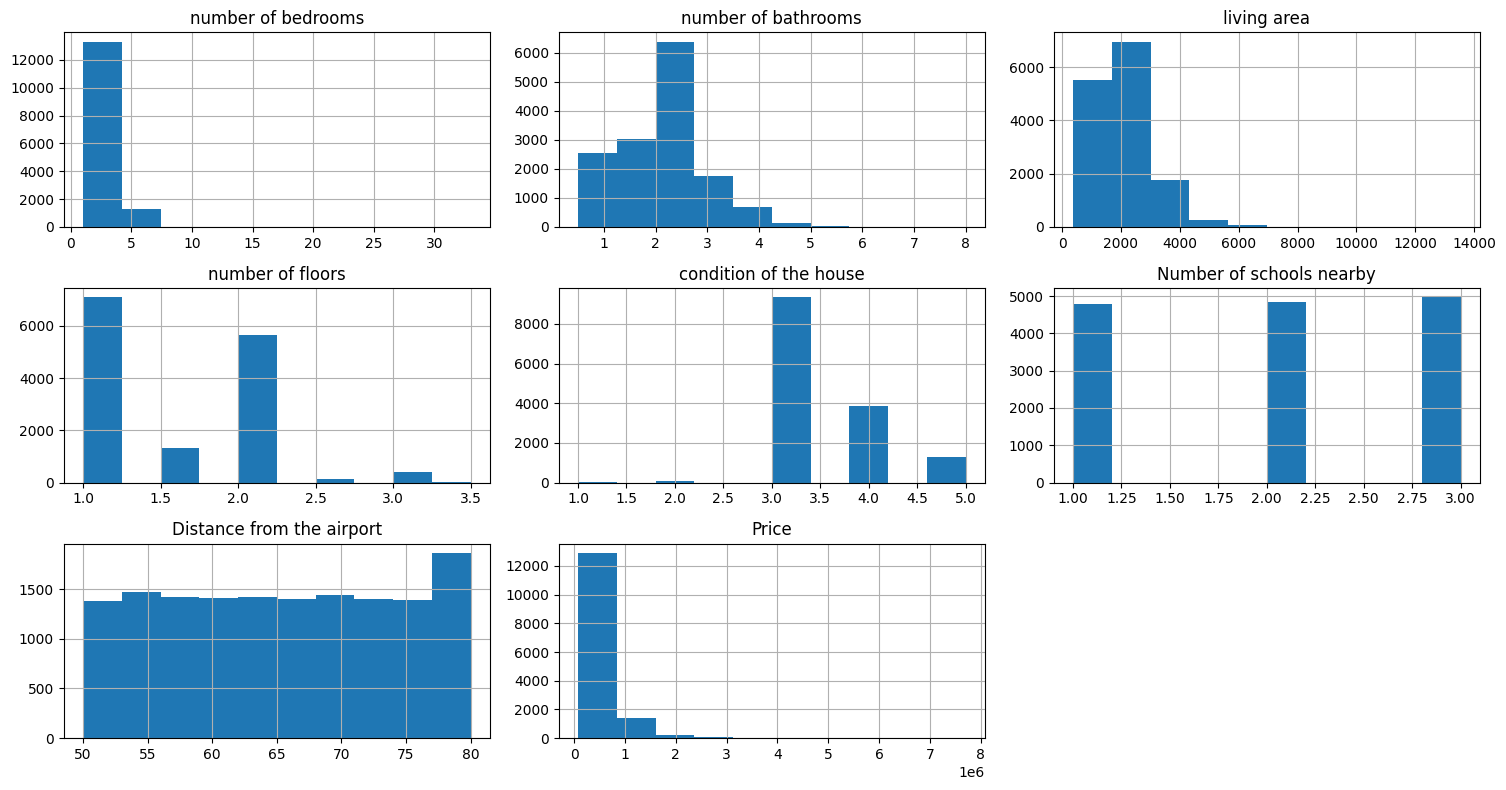

In [41]:
df.hist()

plt.tight_layout()

plt.show()

In [42]:
corr=df.corr()

corr

,number of bedrooms,number of bathrooms,living area,number of floors,condition of the house,Number of schools nearby,Distance from the airport,Price
number of bedrooms,1.000000,0.509783,0.570441,0.177208,0.026326,0.003399,-0.006066,0.308165
number of bathrooms,0.509783,1.000000,0.753540,0.502912,-0.128335,0.002181,0.009232,0.532031
living area,0.570441,0.753540,1.000000,0.354682,-0.063646,0.002372,0.002601,0.712276
number of floors,0.177208,0.502912,0.354682,1.000000,-0.270136,-0.007579,0.016617,0.262649
condition of the house,0.026326,-0.128335,-0.063646,-0.270136,1.000000,-0.006938,-0.002011,0.040609
Number of schools nearby,0.003399,0.002181,0.002372,-0.007579,-0.006938,1.000000,0.004034,0.009904
Distance from the airport,-0.006066,0.009232,0.002601,0.016617,-0.002011,0.004034,1.000000,0.004074
Price,0.308165,0.532031,0.712276,0.262649,0.040609,0.009904,0.004074,1.000000


<Axes: >

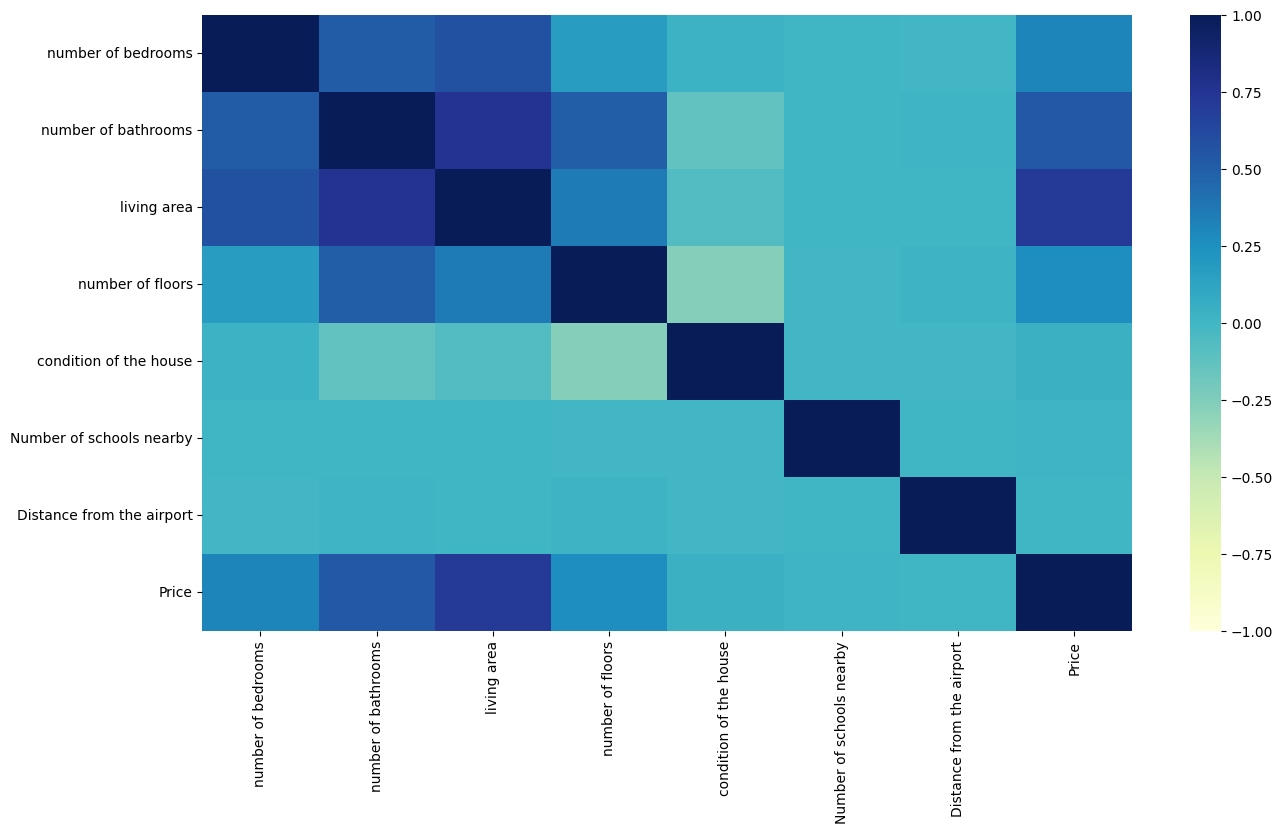

In [43]:
sns.heatmap(corr,cmap='YlGnBu',vmax=1.0,vmin=-1.0)

<Axes: >

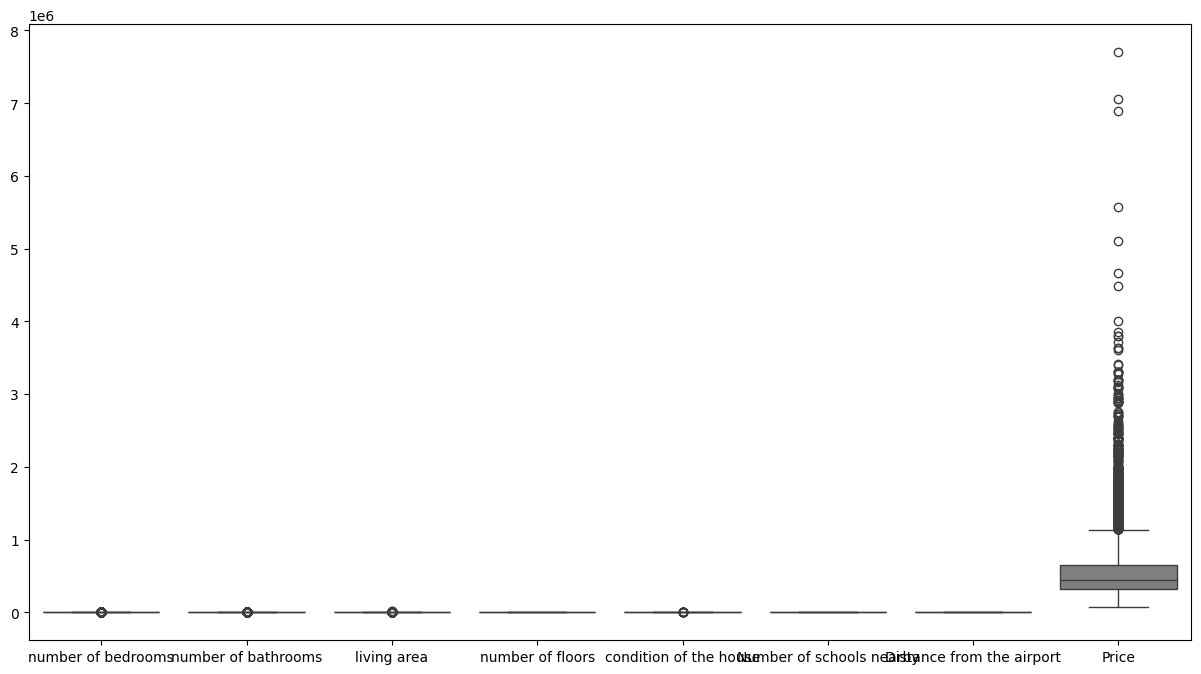

In [44]:
sns.boxplot(df)

In [46]:
# calculate the first quartile
Q1 = df.quantile(0.25)

# calculate the third quartile
Q3 = df.quantile(0.75)

# Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

number of bedrooms                1.00
number of bathrooms               0.75
living area                    1130.00
number of floors                  1.00
condition of the house            1.00
Number of schools nearby          2.00
Distance from the airport        16.00
Price                        325000.00
dtype: float64


In [47]:
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# reset the index of the dataframe without outliers
df = df.reset_index(drop = True)

<Axes: >

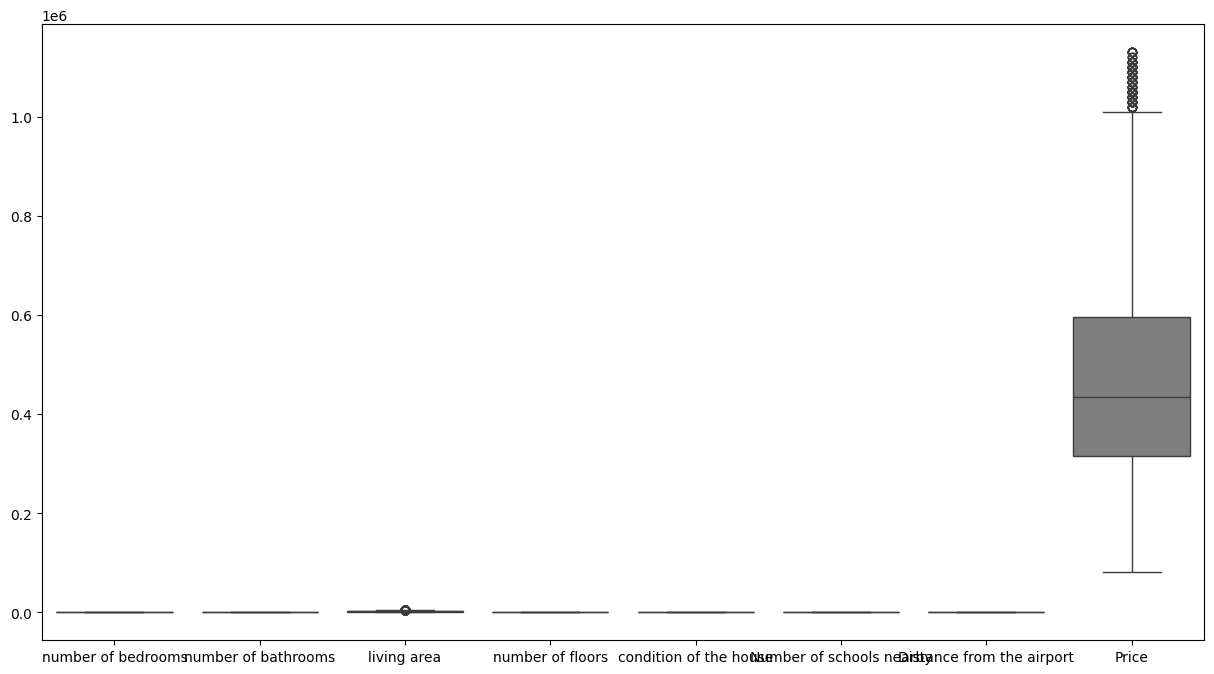

In [48]:
sns.boxplot(df)

In [49]:
df.shape

(13308, 8)

In [50]:
y=pd.DataFrame(df['Price'])

In [51]:
x=df.drop('Price',axis=1)

In [52]:
x.head()

,number of bedrooms,number of bathrooms,living area,number of floors,condition of the house,Number of schools nearby,Distance from the airport
0,4,2.50,3310,2.0,3,3,76
1,3,2.00,2710,1.5,4,1,51
2,3,2.50,2600,1.0,4,1,67
3,5,3.25,3660,2.0,3,3,72
4,3,1.75,2240,2.0,5,3,71


In [53]:
y.head()

,Price
0,838000
1,805000
2,790000
3,785000
4,750000


In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9315, 7)
(3993, 7)
(9315, 1)
(3993, 1)


In [55]:
rf_reg=RandomForestRegressor(n_estimators=100,random_state=10)

rf_reg.fit(x_train,y_train)

RandomForestRegressor(random_state=10)

In [56]:
y_pred=rf_reg.predict(x_test)

In [57]:
mae=metrics.mean_absolute_error(y_test,y_pred)
print("MAE",mae)

mse=metrics.mean_squared_error(y_test,y_pred)
print("MSE",mse)

rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("RMSE",rmse)


MAE 125725.46570791345
MSE 25442554982.581238
RMSE 159507.22548706448


In [58]:
import joblib
joblib.dump(rf_reg,"model.pkl")

['model.pkl']